# Contribution of stratospheric origin ozone to surface ozone extreme events at North America

The ozone is essential element in the atmosphere which protect Earth from strong short solar waves and transit into energy. However, the ozone in the troposphere is one of the pollutants that are toxic for human if it exceed certain level (50ppbv, WHO standard). Thus, it is very important to understand how ozone level at surface change by time and what modulates it. It is known that ozone can be produced secondary from the smoke in the city areas, typically NOx. It is also well known but not studied deep enough about stratospheric ozone intrusion into the surface. For this project, I will analyze how the ozone and stratospheric origin ozone (O3S) varies by time and how it is distributed. Then, based on the certain criterias, the ozone extreme events are defined and displayed how frequent and broad such event is happening. Furthermore, the O3S anomaly is used to study how these ozone extreme events are related to the anomalous intrusion of ozone from the stratosphere. It is first analyzed by itself and then combined with the ozone extreme events to give more insight about where and when these contributions are observed. Moreover, for most of the analysis, seasonal patterns are shown to clearly describe the seasonality in the variables and events to understand the nature of them.

In [1]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import pooch
import cartopy.crs as ccrs
import cartopy
plt.rcParams['figure.figsize'] = (12,6)

## Data

The ozone and the stratospheric origin ozone data used for this project are from CAMS Reanalysis data by ECMWF. It is 3 hourly data with 0.75X0.75 spatial resolution at surface level (lowest model level) only. The North America here is restriced to 150W to 90W for longitude and 0 to 60N for the latitude.

In [2]:
doi = "doi:10.5281/zenodo.5759104"

known_hashs = ["md5:5b953683ae0ada902290a7629f719df5","md5:d334e73cefb4294a66eb637fc94fe1cd"]
shorts = ["O3","O3S"]
for i in range(2):
    fname = "CAMSRA_"+shorts[i]+"_NA.nc"
    file_path = pooch.retrieve(
        url=f"{doi}/{fname}",
        known_hash=known_hashs[i],
    )
    if i == 0:
        ds = xr.open_dataset(file_path)
    else:
        temp = xr.open_dataset(file_path)
        ds = xr.merge([ds, temp])
del temp
ds

<xarray.Dataset>
Dimensions:    (longitude: 121, latitude: 81, time: 52600)
Coordinates:
  * longitude  (longitude) float32 210.0 210.8 211.5 212.2 ... 298.5 299.2 300.0
  * latitude   (latitude) float32 60.0 59.25 58.5 57.75 ... 2.25 1.5 0.75 0.0
  * time       (time) datetime64[ns] 2003-01-01 ... 2020-12-31T21:00:00
Data variables:
    go3        (time, latitude, longitude) float32 ...
    o3s        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-12-04 22:18:37 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

Since these two variables have unit of mass mixing ratio(kgkg^-1), we need to convert into volume mixing ratio(ppbv: molmol^-1)

In [3]:
ds = 28.9644 / 47.9982 * 1e9 *ds

## Climatology and timeseries

Let us first examine the structure of data by displaying composite and timeseries of mean value over the region

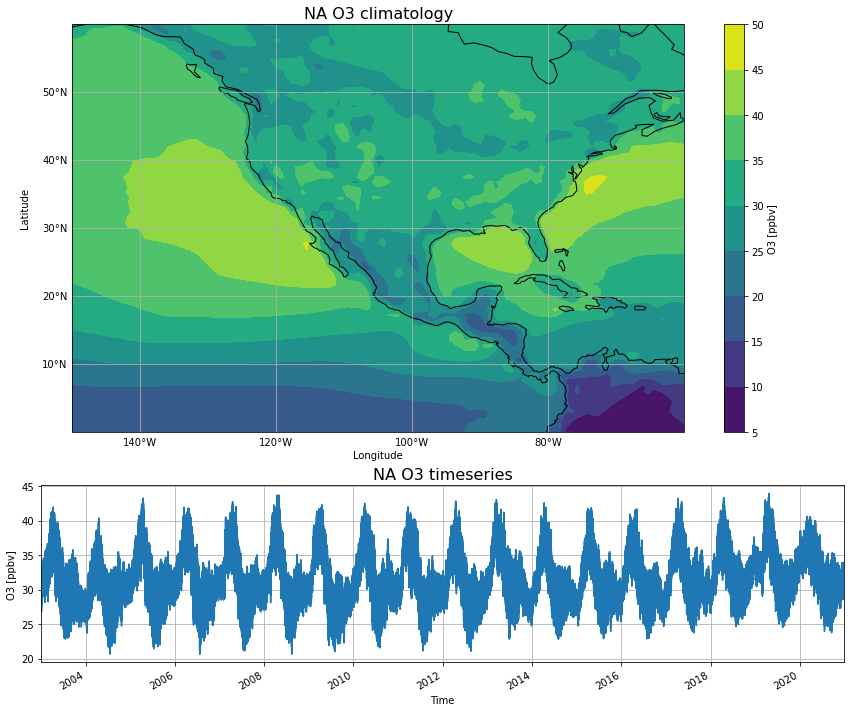

In [4]:
x, y = np.meshgrid(ds.longitude,ds.latitude)
extent = [-150,-60,0,60]
fig = plt.figure(figsize=(12,10))

ax1 = plt.subplot(3,1,(1,2),projection=ccrs.PlateCarree())
ax1.set_extent(extent,crs=ccrs.PlateCarree())
ax1.coastlines()
g1 = ax1.gridlines()
g1.left_labels = True
g1.bottom_labels = True
c1 = ax1.contourf(x,y,ds.go3.mean('time'))
ax1.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes)
ax1.text(0.5, -0.07, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax1.transAxes)
cbar1 = plt.colorbar(c1)
cbar1.set_label('O3 [ppbv]')
ax1.set_title('NA O3 climatology',fontsize=16)

ax2 = plt.subplot(313)
ds.go3.mean(['latitude','longitude']).plot()
plt.ylabel('O3 [ppbv]')
plt.xlabel('Time')
plt.title('NA O3 timeseries',fontsize=16)
plt.grid(True)
ax2.set_xlim(pd.Timestamp('2003-01-01'),pd.Timestamp('2021-01-01'))
fig.tight_layout()

We could see that peaks at composite are located near both coast. Generally, ocean has higher ozone concentration than land at the same latitude. Also, tropic has lowest ozone concentration and it increase till the midlatitude and decrease again as the latitude gets higher. 

From a timeseries, broad and messy seasonality is shown. It peaks at early summer or late spring and decays to lowest value around fall. There aren't any significant trend or low frequency patterns shown in the timeseries.

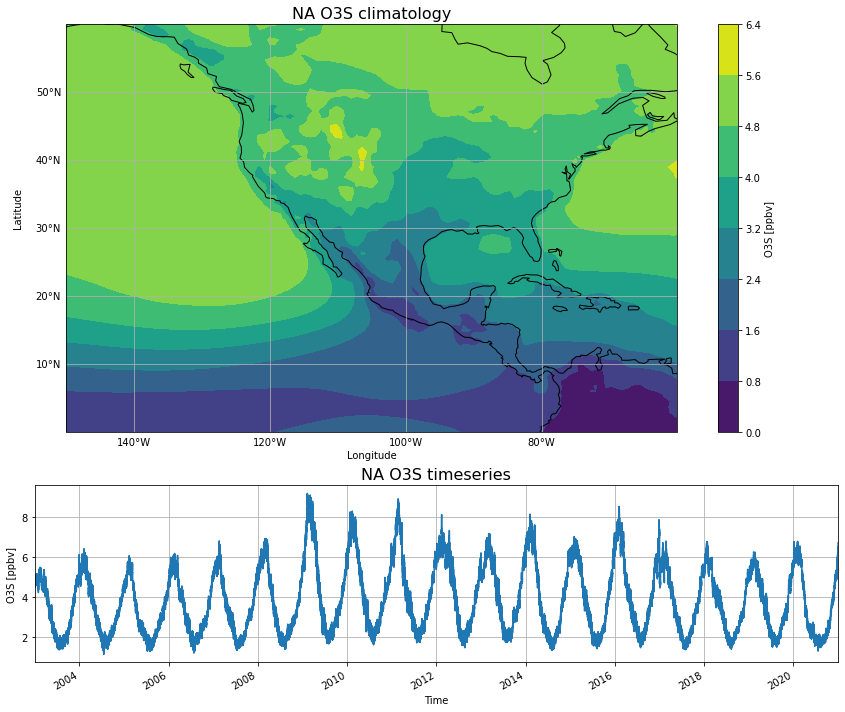

In [5]:
fig = plt.figure(figsize=(12,10))
ax1 = plt.subplot(3,1,(1,2),projection=ccrs.PlateCarree())
ax1.set_extent(extent,crs=ccrs.PlateCarree())
ax1.coastlines()
g1 = ax1.gridlines()
g1.left_labels = True
g1.bottom_labels = True
c1 = ax1.contourf(x,y,ds.o3s.mean('time'))
ax1.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes)
ax1.text(0.5, -0.07, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax1.transAxes)
cbar1 = plt.colorbar(c1)
cbar1.set_label('O3S [ppbv]')
ax1.set_title('NA O3S climatology',fontsize=16)

ax2 = plt.subplot(313)
ds.o3s.mean(['latitude','longitude']).plot()
plt.ylabel('O3S [ppbv]')
plt.xlabel('Time')
ax2.set_title('NA O3S timeseries',fontsize=16)
plt.grid(True)
ax2.set_xlim(pd.Timestamp('2003-01-01'),pd.Timestamp('2021-01-01'))
fig.tight_layout()

A similar pattern is observed with some exceptions in the higher elevation regions. The ocean has higher O3S than the land and tropic has the lowest O3S values. However, it does not show clear decrease of O3S level in the higher latitude and show peaks at the mountain regions, which is expected because higher elevation in the mountain region makes the stratospheric air to intrude more easily.

Compared to O3, this timeseries clearly shows the seasonality, highest during winter and lowest around summer. Also, we could see that there is manifest annual variability in the peaks. The years from 2009 to 2016 have more stronger peaks than the other years before and after, which is abrupt especially between 2008 and 2009. The minimas does not change much by year compared to the maximas.

## Extreme O3 events

Based on the U.S. Environmental Protection Agency (EPA) criteria, the ozone extreme events are defined to be the period when O3 level exceed 70 ppbv. The original definition is based on maximum daily 8-hour average, but because of the time resolution, I chose all the time that suits the criteria. The level for shading starts from 1, to distinguish from region where no event occured.

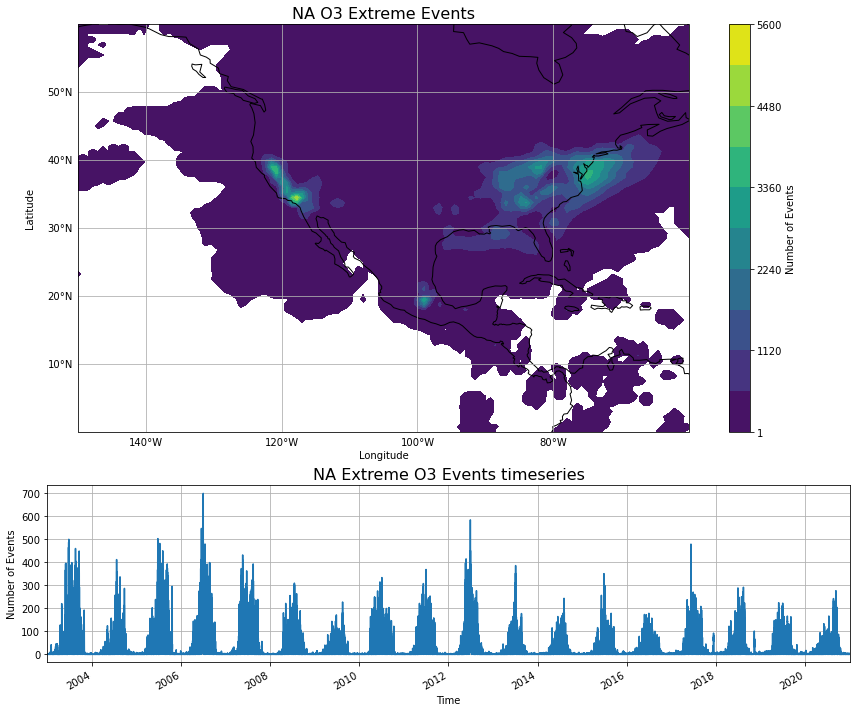

In [6]:
clevel = np.linspace(0,1,11)*5600
clevel[0] = 1
fig = plt.figure(figsize=(12,10))
ax1 = plt.subplot(3,1,(1,2),projection=ccrs.PlateCarree())
ax1.set_extent(extent,crs=ccrs.PlateCarree())
ax1.coastlines()
g1 = ax1.gridlines()
g1.left_labels = True
g1.bottom_labels = True
c1 = ax1.contourf(x,y,(ds.go3>70).sum('time'),levels=clevel)
ax1.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes)
ax1.text(0.5, -0.07, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax1.transAxes)
cbar1 = plt.colorbar(c1)
cbar1.set_label('Number of Events')
ax1.set_title('NA O3 Extreme Events',fontsize=16)

ax2 = plt.subplot(313)
(ds.go3>70).sum(['latitude','longitude']).plot()
plt.ylabel('Number of Events')
plt.xlabel('Time')
plt.title('NA Extreme O3 Events timeseries',fontsize=16)
plt.grid(True)
ax2.set_xlim(pd.Timestamp('2003-01-01'),pd.Timestamp('2021-01-01'))
fig.tight_layout()

For the east coast, the region where composite value of O3 peaks also have most frequent events. However, for the west coast, even though the ozone climatology peaks at the ocean region, the extreme events are more frequent in the land, following the coast line. Most of the event happened around 30-40ºN except for small peak aroung (20ºN,100ºW).

Interestingly, although O3 timeseries show maxima around early summer or late spring, the extreme O3 events happen mostly on during summer. It still happens at other time of the year, but still clear peaks are seen every year. There is also strong annual variability shown in the event timeseries. Compared to the earlier period, the O3 extreme event decreased a lot, maybe indicating the anthropogenic effort of reducing ozone pollution.

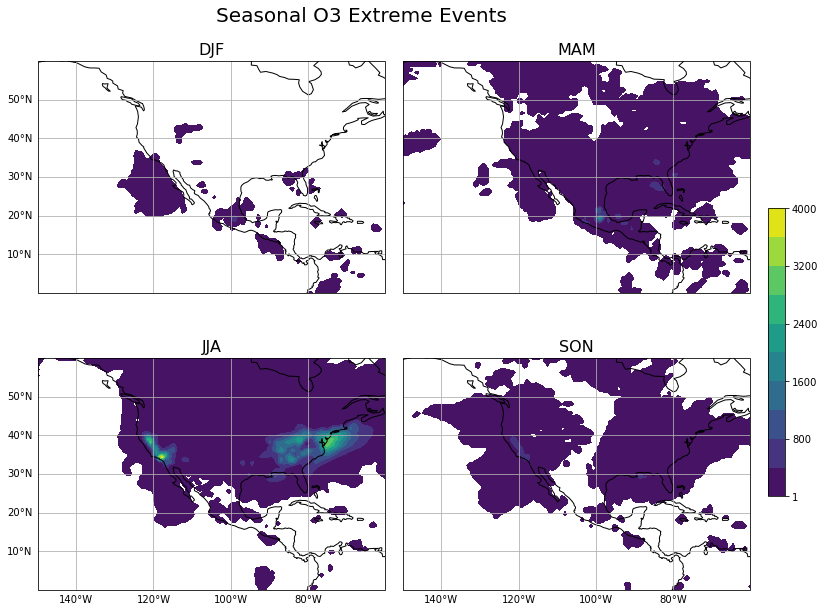

In [7]:
clevel = np.linspace(0,1,11)*4000
clevel[0] = 1
fig, ax= plt.subplots(2,2,figsize=(12,10),subplot_kw={'projection': ccrs.PlateCarree()})

ax[0,0].set_extent(extent,crs=ccrs.PlateCarree())
ax[0,0].coastlines()
g1 = ax[0,0].gridlines()
g1.left_labels = True
ax[0,0].contourf(x,y,(ds.go3>70).groupby('time.season').sum(dim="time").sel(season='DJF'),levels=clevel)
ax[0,0].set_title('DJF',fontsize=16)

ax[0,1].set_extent(extent,crs=ccrs.PlateCarree())
ax[0,1].coastlines()
g2 = ax[0,1].gridlines()
ax[0,1].contourf(x,y,(ds.go3>70).groupby('time.season').sum(dim="time").sel(season='MAM'),levels=clevel)
ax[0,1].set_title('MAM',fontsize=16)

ax[1,0].set_extent(extent,crs=ccrs.PlateCarree())
ax[1,0].coastlines()
g3 = ax[1,0].gridlines()
g3.left_labels = True
g3.bottom_labels = True
c3 = ax[1,0].contourf(x,y,(ds.go3>70).groupby('time.season').sum(dim="time").sel(season='JJA'),levels=clevel)
ax[1,0].set_title('JJA',fontsize=16)

ax[1,1].set_extent(extent,crs=ccrs.PlateCarree())
ax[1,1].coastlines()
g4 = ax[1,1].gridlines()
g4.bottom_labels = True
ax[1,1].contourf(x,y,(ds.go3>70).groupby('time.season').sum(dim="time").sel(season='SON'),levels=clevel)
ax[1,1].set_title('SON',fontsize=16)

fig.suptitle('Seasonal O3 Extreme Events',fontsize=20)
fig.subplots_adjust(top=0.95,right=0.95,wspace=0.05,hspace=0)
cbar_ax = fig.add_axes([0.97, 0.3, 0.02, 0.4])
fig.colorbar(c3, cax=cbar_ax)

Above, seasonal patterns are displayed to show whether occurence of these event change by season. As expected form the timeseries, summer (JJA) has most events and winter has the lowest frequency. Morever, we could see that peak at 20ºN is mostly happening during spring (MAM), but does not seen at summer. Overall, tropical region has almost no events through out the year and most of the event happens at midlatitude.

## Extreme O3S events

For the O3S, anomalous values are used to define the extreme events. This is because the questions we are up to are mostly focused on eventwise occurence of the ozone extreme events and how much of them are contributed to stratospheric ozone. That being said, because I am interested in analyzing the occational event of ozone extreme, I am focusing more on the anomalous contribution of O3S apart from climatology. For the analysis, month window running mean is done to calculate the climatology and subtracted to derive the anomalous O3S.

In [8]:
ds_rolling = ds.rolling(time=240,min_periods=1,center=True).mean()
ds_anom = ds-ds_rolling
del ds_rolling

Before analyzing the contribution of the anomalous O3S, the extremes of anomalous O3S are investigated to understand its feature.

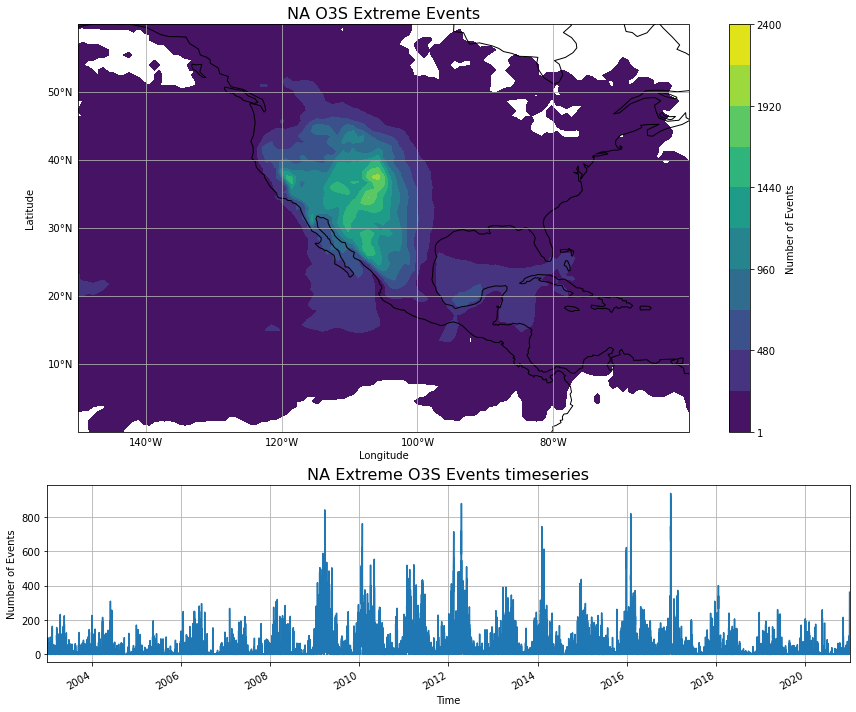

In [9]:
clevel = np.linspace(0,1,11)*2400
clevel[0] = 1
fig = plt.figure(figsize=(12,10))
ax1 = plt.subplot(3,1,(1,2),projection=ccrs.PlateCarree())
ax1.set_extent(extent,crs=ccrs.PlateCarree())
ax1.coastlines()
g1 = ax1.gridlines()
g1.left_labels = True
g1.bottom_labels = True
c1 = ax1.contourf(x,y,(ds_anom.o3s>5).sum('time'),levels=clevel)
ax1.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes)
ax1.text(0.5, -0.07, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax1.transAxes)
cbar1 = plt.colorbar(c1)
cbar1.set_label('Number of Events')
ax1.set_title('NA O3S Extreme Events',fontsize=16)

ax2 = plt.subplot(313)
(ds_anom.o3s>5).sum(['latitude','longitude']).plot()
plt.ylabel('Number of Events')
plt.xlabel('Time')
plt.title('NA Extreme O3S Events timeseries',fontsize=16)
plt.grid(True)
ax2.set_xlim(pd.Timestamp('2003-01-01'),pd.Timestamp('2021-01-01'))
fig.tight_layout()

The anomalous O3S extreme events are mostly happening around Rocky mountain and the west coast. The timeseries again shows strong annual variability. Its peaks are strong from 2009 to 2017 and total number of events for the year is also relatively high. 

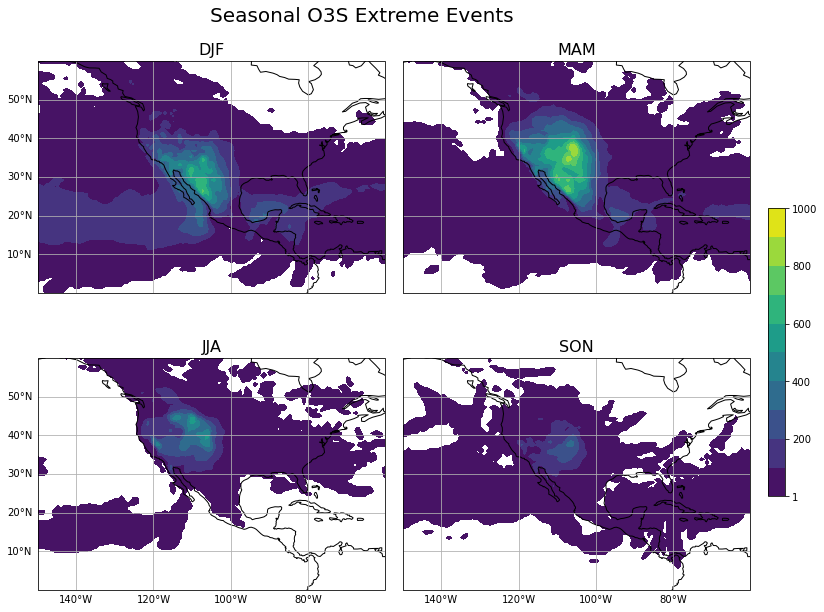

In [10]:
clevel = np.linspace(0,1,11)*1000
clevel[0] = 1
fig, ax= plt.subplots(2,2,figsize=(12,10),subplot_kw={'projection': ccrs.PlateCarree()})

ax[0,0].set_extent(extent,crs=ccrs.PlateCarree())
ax[0,0].coastlines()
g1 = ax[0,0].gridlines()
g1.left_labels = True
ax[0,0].contourf(x,y,(ds_anom.o3s>5).groupby('time.season').sum(dim="time").sel(season='DJF'),levels=clevel)
ax[0,0].set_title('DJF',fontsize=16)

ax[0,1].set_extent(extent,crs=ccrs.PlateCarree())
ax[0,1].coastlines()
g2 = ax[0,1].gridlines()
ax[0,1].contourf(x,y,(ds_anom.o3s>5).groupby('time.season').sum(dim="time").sel(season='MAM'),levels=clevel)
ax[0,1].set_title('MAM',fontsize=16)

ax[1,0].set_extent(extent,crs=ccrs.PlateCarree())
ax[1,0].coastlines()
g3 = ax[1,0].gridlines()
g3.left_labels = True
g3.bottom_labels = True
c3 = ax[1,0].contourf(x,y,(ds_anom.o3s>5).groupby('time.season').sum(dim="time").sel(season='JJA'),levels=clevel)
ax[1,0].set_title('JJA',fontsize=16)

ax[1,1].set_extent(extent,crs=ccrs.PlateCarree())
ax[1,1].coastlines()
g4 = ax[1,1].gridlines()
g4.bottom_labels = True
ax[1,1].contourf(x,y,(ds_anom.o3s>5).groupby('time.season').sum(dim="time").sel(season='SON'),levels=clevel)
ax[1,1].set_title('SON',fontsize=16)

fig.suptitle('Seasonal O3S Extreme Events',fontsize=20)
fig.subplots_adjust(top=0.95,right=0.95,wspace=0.05,hspace=0)
cbar_ax = fig.add_axes([0.97, 0.3, 0.02, 0.4])
fig.colorbar(c3, cax=cbar_ax)

Again, seasonal patterns are displayed. We could see the clear transition of the latitude where most of the events occur. At winter it is centered aroung 30ºN, the lowest, and it gets higher till summer where it is highest, around 40ºN. Also, in winter, some of the events happen around 20ºN at all longitude, which might be related to global circulation. Overall, spring has the highest freqeuncy and winter is next. Another interesting point is that during winter, events are happening relatively closer to the coast line, where summer is more concentrated in the inland area.

## Stratosphere-contributed O3 extreme events

Now, both of the criteria is considered simultaneously to make a result. 

In [11]:
extreme_event = np.array(ds.go3>70)&np.array(ds_anom.o3s>5)
extreme_event = xr.DataArray(extreme_event, name='extreme_event',
                            dims=["time","latitude", "longitude"])
ds_anom = xr.merge([ds_anom,extreme_event])

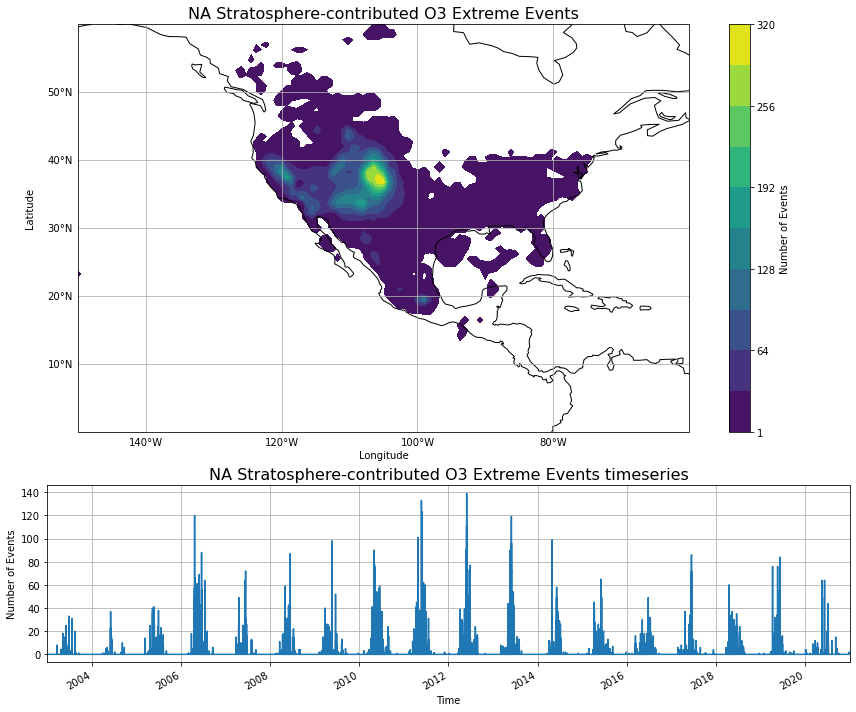

In [12]:
clevel = np.linspace(0,1,11)*320
clevel[0] = 1
fig = plt.figure(figsize=(12,10))
ax1 = plt.subplot(3,1,(1,2),projection=ccrs.PlateCarree())
ax1.set_extent(extent,crs=ccrs.PlateCarree())
ax1.coastlines()
g1 = ax1.gridlines()
g1.left_labels = True
g1.bottom_labels = True
c1 = ax1.contourf(x,y,ds_anom.extreme_event.sum('time'),levels=clevel)
ax1.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes)
ax1.text(0.5, -0.07, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax1.transAxes)
cbar1 = plt.colorbar(c1)
cbar1.set_label('Number of Events')
ax1.set_title('NA Stratosphere-contributed O3 Extreme Events',fontsize=16)

ax2 = plt.subplot(313)
ds_anom.extreme_event.sum(['latitude','longitude']).plot()
plt.ylabel('Number of Events')
plt.xlabel('Time')
plt.title('NA Stratosphere-contributed O3 Extreme Events timeseries',fontsize=16)
plt.grid(True)
ax2.set_xlim(pd.Timestamp('2003-01-01'),pd.Timestamp('2021-01-01'))
fig.tight_layout()

From the total events by region, we could see that almost none of the stratosphere-contributed event is on the ocean. We could see the strongest peak at mountain region and weaker peak along the west coast of US and small peak below at 20ºN, and most of the events are in the latitude band 30~40ºN.  From the tiemseries, we could see that it is mostly controled by O3S extreme events. The O3 extreme events are frequent before 2008 but it is not shown in this timeseries except 2006. It have peaks at 2006 and aroung 2012. From the two timeseries before, 2006 peak is expected from a lot of O3 extreme events and most of the other peaks around 2012 are from both extreme events and other peaks later than that are from O3S extreme events. 

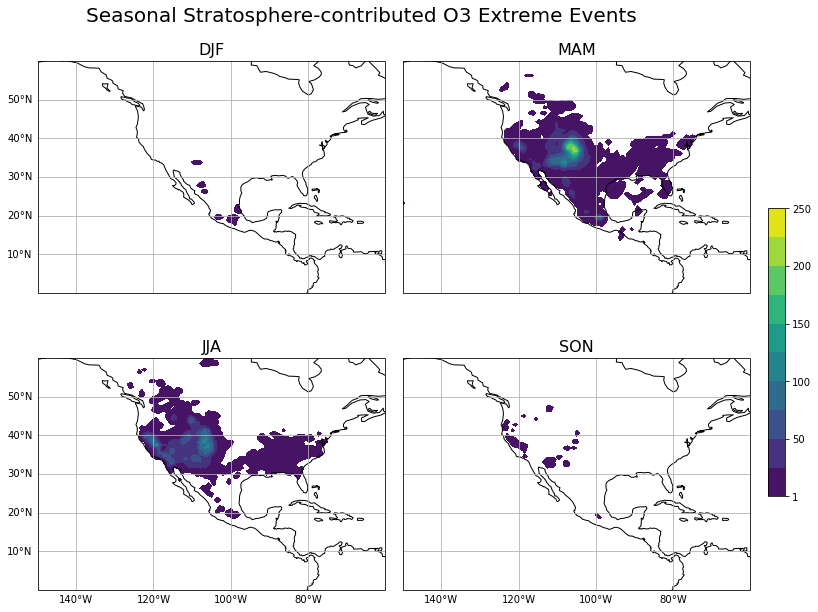

In [13]:
clevel = np.linspace(0,1,11)*250
clevel[0] = 1
fig, ax= plt.subplots(2,2,figsize=(12,10),subplot_kw={'projection': ccrs.PlateCarree()})

ax[0,0].set_extent(extent,crs=ccrs.PlateCarree())
ax[0,0].coastlines()
g1 = ax[0,0].gridlines()
g1.left_labels = True
ax[0,0].contourf(x,y,ds_anom.extreme_event.groupby('time.season').sum(dim="time").sel(season='DJF'),levels=clevel)
ax[0,0].set_title('DJF',fontsize=16)

ax[0,1].set_extent(extent,crs=ccrs.PlateCarree())
ax[0,1].coastlines()
g2 = ax[0,1].gridlines()
ax[0,1].contourf(x,y,ds_anom.extreme_event.groupby('time.season').sum(dim="time").sel(season='MAM'),levels=clevel)
ax[0,1].set_title('MAM',fontsize=16)

ax[1,0].set_extent(extent,crs=ccrs.PlateCarree())
ax[1,0].coastlines()
g3 = ax[1,0].gridlines()
g3.left_labels = True
g3.bottom_labels = True
c3 = ax[1,0].contourf(x,y,ds_anom.extreme_event.groupby('time.season').sum(dim="time").sel(season='JJA'),levels=clevel)
ax[1,0].set_title('JJA',fontsize=16)

ax[1,1].set_extent(extent,crs=ccrs.PlateCarree())
ax[1,1].coastlines()
g4 = ax[1,1].gridlines()
g4.bottom_labels = True
ax[1,1].contourf(x,y,ds_anom.extreme_event.groupby('time.season').sum(dim="time").sel(season='SON'),levels=clevel)
ax[1,1].set_title('SON',fontsize=16)

fig.suptitle('Seasonal Stratosphere-contributed O3 Extreme Events',fontsize=20)
fig.subplots_adjust(top=0.95,right=0.95,wspace=0.05,hspace=0)
cbar_ax = fig.add_axes([0.97, 0.3, 0.02, 0.4])
fig.colorbar(c3, cax=cbar_ax)

Finally, seasonal patterns of stratosphere-contributed O3 extreme events are analyzed. There is almost no event during winter and fall. During the spring, most of the events are focused on the mountain region, which could be interpreted as response of increased ozone amount in the lower stratosphere during spring. More interesting feature are shown during the summer. It is more evenly distributed to coast and mountain region. In summer, some of prior researches have reported extreme O3 events that are thought to be occured because of stratospheric intrusion based on the ozonesonde observation. Thus, it shows consistent result and from the reanalysis observation, we could understand these events' spatial and temporal distribution in the bigger scale, climatologcal sense.

## Further study needed

* Verification of this state of the art data compared to the observation and prior research.
* Annual variability that controls the O3S needs more study to understand the events.
* Dynamics underneath this events to understand regional and temporal patterns.
* Expand to other hotspots around the globe.